In [3]:
# Importing important Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [4]:
#importing dataset
data=pd.read_csv('Churn_Modelling.csv')

In [5]:
# viewing dataset
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
#Collecting important information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# drop unnecessary columns
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [8]:
#Convert Categorical variables to numerical using one-hot encoding
data=pd.get_dummies(data,columns=['Geography','Gender'],drop_first=True)

In [9]:
#Split data into features (x) and target variables (y)
X=data.drop('Exited',axis=1)
y=data['Exited']

In [10]:
#Split the data into training and testing dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
# Standardize the features
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [12]:
# Model Training by Logistic Regression
lr_model=LogisticRegression()
lr_model.fit(X_train_scaled,y_train)

LogisticRegression()

In [13]:
# RandomForest
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Gradient Boosting
gb_model=GradientBoostingClassifier(n_estimators=100,random_state=42)
gb_model.fit(X_train_scaled,y_train)

GradientBoostingClassifier(random_state=42)

In [15]:
# Feature Importance for Random Forest
feature_importances=rf_model.feature_importances_
feature_names=X.columns
feature_importance_df=pd.DataFrame({'Feature':feature_names,'Importance':feature_importances})
feature_importance_df=feature_importance_df.sort_values(by='Importance',ascending=False)

In [16]:
#HyperParameter Tuning Random Forest
param_grid={
    'n_estimators':[50,100,150],
    'max_depth':[None,10,20],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [17]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=3)
grid_search.fit(X_train_scaled,y_train)

best_rf_model=grid_search.best_estimator_

In [18]:
#Model Evaluation
lr_pred=lr_model.predict(X_test_scaled)
rf_pred=rf_model.predict(X_test_scaled)
gb_pred=gb_model.predict(X_test_scaled)

In [19]:
# ROC-AUC for Random Forest
rf_probs = rf_model.predict_proba(X_test_scaled)[:, 1]
rf_roc_auc = roc_auc_score(y_test, rf_probs)
print("Random Forest ROC-AUC:", rf_roc_auc)

Random Forest ROC-AUC: 0.8653307492189862


In [54]:
# Precision-Recall Curve for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_probs)
pr_auc_rf = auc(recall_rf, precision_rf)

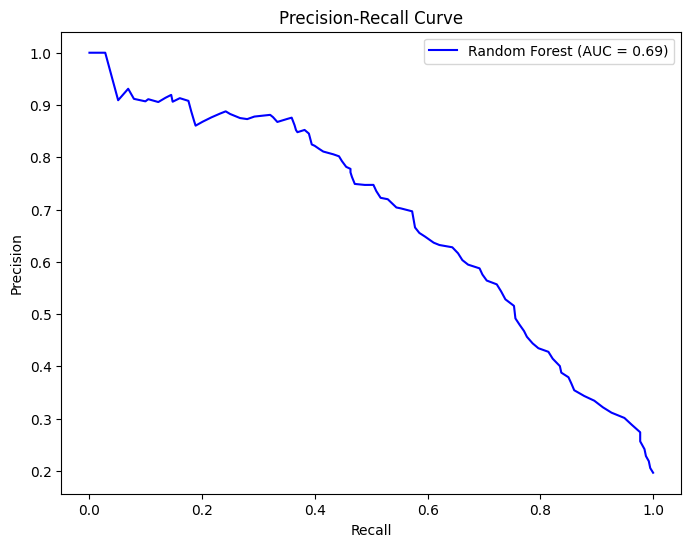

In [55]:
# Plot Precision-Recall Curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, color='blue', label=f'Random Forest (AUC = {pr_auc_rf:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [58]:
# Threshold Adjustment for Random Forest
adjusted_threshold = 0.4  # Adjust based on business requirements
rf_pred_adjusted = (rf_probs > adjusted_threshold).astype(int)
print("Random Forest Adjusted Accuracy:", accuracy_score(y_test, rf_pred_adjusted))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

Random Forest Adjusted Accuracy: 0.86
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [69]:
# logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("\nConfusion Matrix - Logistic Regression:\n", confusion_matrix(y_test, lr_pred))
print("\nClassification Report - Logistic Regression:\n", classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.811

Confusion Matrix - Logistic Regression:
 [[1543   64]
 [ 314   79]]

Classification Report - Logistic Regression:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [66]:
# Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nConfusion Matrix - Random Forest:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report - Random Forest:\n", classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.8665

Confusion Matrix - Random Forest:
 [[1550   57]
 [ 210  183]]

Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [70]:
#Gradient Boosting
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("\nConfusion Matrix - Gradient Boosting:\n", confusion_matrix(y_test, gb_pred))
print("\nClassification Report - Gradient Boosting:\n", classification_report(y_test, gb_pred))

Gradient Boosting Accuracy: 0.8675

Confusion Matrix - Gradient Boosting:
 [[1543   64]
 [ 201  192]]

Classification Report - Gradient Boosting:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



# Observation

- All models have higher accuracy compared to a naive model (predicting all as non-churn).
- Gradient Boosting and the adjusted Random Forest outperform Logistic Regression in terms of precision, recall, and F1-score for predicting churn.
- Gradient Boosting has a slightly higher recall for predicting churn compared to the adjusted Random Forest.

# Considerations:
Depending on the business context, you may prioritize different metrics. For example, if reducing false positives (precision) is crucial, you might prefer the adjusted Random Forest. If capturing more actual churn cases (recall) is a priority, you might lean towards Gradient Boosting.
